Clustering marketing


In [71]:
# clear data and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('03_Clustering_Marketing.csv')
df = df.dropna()

In [72]:
df.isna().sum().sort_values(ascending=False)

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [73]:
len(df)

12042

In [74]:
df.dropna(inplace=True) 
df.isna().sum().sort_values(ascending=False)

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [75]:
len(df)

12042

In [76]:
df.duplicated().sum()

np.int64(9)

Feature Extraction & Engineering

In [77]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] # buat ngambil kolom kategorikal

categorical_cols

['gender', 'age']

In [79]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

gender
F    9710
M    2332
Name: count, dtype: int64
--------------------------------------------------
age
16. Jun    24
17.399     20
16.591     20
17.311     19
16.764     19
           ..
15.17       1
106.119     1
19.37       1
19.732      1
20.025      1
Name: count, Length: 1887, dtype: int64
--------------------------------------------------


In [80]:
from sklearn.preprocessing import StandardScaler

# menghapus baris dengan nilai NaN pada 'age' dan 'gender'
df_cleaned = df.dropna(subset=['age', 'gender']).copy()

# mengonversi 'gender' menjadi numerik 
df_cleaned['gender'] = df_cleaned['gender'].map({'F': 0, 'M': 1})

# memilih hanya fitur numerik untuk clustering dan dimensionality reduction
numeric_features = df_cleaned.select_dtypes(include=['number']).columns
df_numeric = df_cleaned[numeric_features]

# normalisasi data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)

# menampilkan 5 baris pertama setelah preprocessing
df_scaled.head()

,gradyear,gender,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.430279,-0.490066,0.521110,-0.345082,-0.374164,0.805808,-0.222762,-0.222222,1.524662,-0.209908,...,-0.04049,-0.377640,-0.496758,-0.320642,-0.198153,-0.185809,-0.309998,-0.26291,2.101008,-0.175904
1,-0.430279,-0.490066,0.295868,-0.345082,-0.374164,-0.245497,-0.222762,-0.222222,-0.244633,-0.209908,...,-0.04049,0.993753,-0.496758,-0.320642,-0.198153,-0.185809,-0.309998,-0.26291,2.101008,2.522483
2,0.464457,-0.490066,-0.830340,-0.345082,-0.374164,-0.245497,-0.222762,-0.222222,1.524662,-0.209908,...,-0.04049,-0.377640,-0.496758,5.903702,-0.198153,-0.185809,-0.309998,-0.26291,-0.222469,-0.175904
3,0.464457,2.040541,0.042471,-0.345082,6.611396,-0.245497,-0.222762,-0.222222,-0.244633,-0.209908,...,-0.04049,-0.377640,-0.496758,-0.320642,-0.198153,-0.185809,-0.309998,-0.26291,-0.222469,-0.175904
4,-1.325015,2.040541,-0.351702,-0.345082,-0.374164,-0.245497,-0.222762,-0.222222,-0.244633,-0.209908,...,-0.04049,-0.377640,-0.496758,1.754139,-0.198153,-0.185809,-0.309998,-0.26291,-0.222469,-0.175904


In [81]:

if 'gender' not in df.columns:
	df['gender'] = np.nan  
df['gender'] = df['gender'].replace({'2n Cycle': 'Master'})

In [113]:
# periksa apakah kolom 'NumberOffriends' ada di dalam DataFrame
if 'NumberOffriends' not in df.columns:
    df['NumberOffriends'] = np.nan  

df['NumberOffriends'] = df['NumberOffriends'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single', 'Together': 'Married', 'Married': 'Married'})

In [83]:
df.columns

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\3134702835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOffriends'].fillna('Unknown', inplace=True)


NumberOffriends
0      1934
1       352
2       248
3       246
5       215
       ... 
292       1
605       1
216       1
181       1
199       1
Name: count, Length: 229, dtype: int64


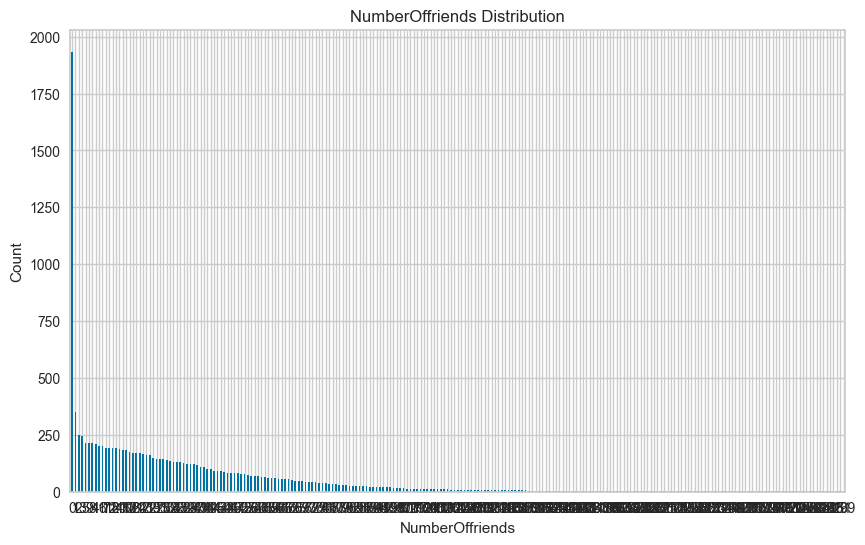

In [84]:

if 'NumberOffriends' not in df.columns:
	df['NumberOffriends'] = np.nan  

df['NumberOffriends'].fillna('Unknown', inplace=True)

marital_status_counts = df['NumberOffriends'].value_counts()

print(marital_status_counts)

plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar')
plt.title('NumberOffriends Distribution')
plt.xlabel('NumberOffriends')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [85]:
# Periksa apakah kolom 'drunk	drugs' ada di dalam DataFrame
for column in ['drunk	drugs']:
    if column not in df.columns:
        df[column] = 0 

people_per_household = df['NumberOffriends'].replace({
    'Single': 1,
    'In a relationship': 2,
    'Married': 2,
    'Unknown': 1  
})

df['Family_Size'] = df['drunk'] + df['drugs'] + people_per_household

In [86]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

gender
F    9710
M    2332
Name: count, dtype: int64
--------------------------------------------------
age
16. Jun    24
17.399     20
16.591     20
17.311     19
16.764     19
           ..
15.17       1
106.119     1
19.37       1
19.732      1
20.025      1
Name: count, Length: 1887, dtype: int64
--------------------------------------------------


In [87]:
df['gradyear'] = df['gradyear'].replace({'2n Cycle' : 'Master'})

In [88]:
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,drunk\tdrugs,Family_Size
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,50
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,43
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,3,0,0,0,0,0,0,0,1
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,21
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,50
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20


In [89]:
df.drop(['age', 'gender'], axis=1, inplace=True)

In [90]:
df.columns

Index(['gradyear', 'NumberOffriends', 'basketball', 'football', 'soccer',
       'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball',
       'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance',
       'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible',
       'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister',
       'abercrombie', 'die', 'death', 'drunk', 'drugs', 'drunk\tdrugs',
       'Family_Size'],
      dtype='object')

In [112]:
purchase_columns = ['gradyear', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports']

for col in purchase_columns:
	if col not in df.columns:
		df[col] = 0

df['Total_Purchases'] = df[purchase_columns].sum(axis=1)

In [92]:
df.sample(2, random_state=42)

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,clothes,hollister,abercrombie,die,death,drunk,drugs,drunk\tdrugs,Family_Size,Total_Purchases
7637,2009,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2012
4758,2007,28,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,28,2037


Feature Encoding


In [93]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object'] # buat ngambil kolom kategorikal

categorical_cols

[]

In [94]:
from feature_engine.encoding import OrdinalEncoder

# inisialisasi encoder
encoder = OrdinalEncoder


In [95]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] 

numeric_cols



['gradyear',
 'NumberOffriends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs',
 'drunk\tdrugs',
 'Family_Size',
 'Total_Purchases']

C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\2728939930.py:2: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\kipli\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


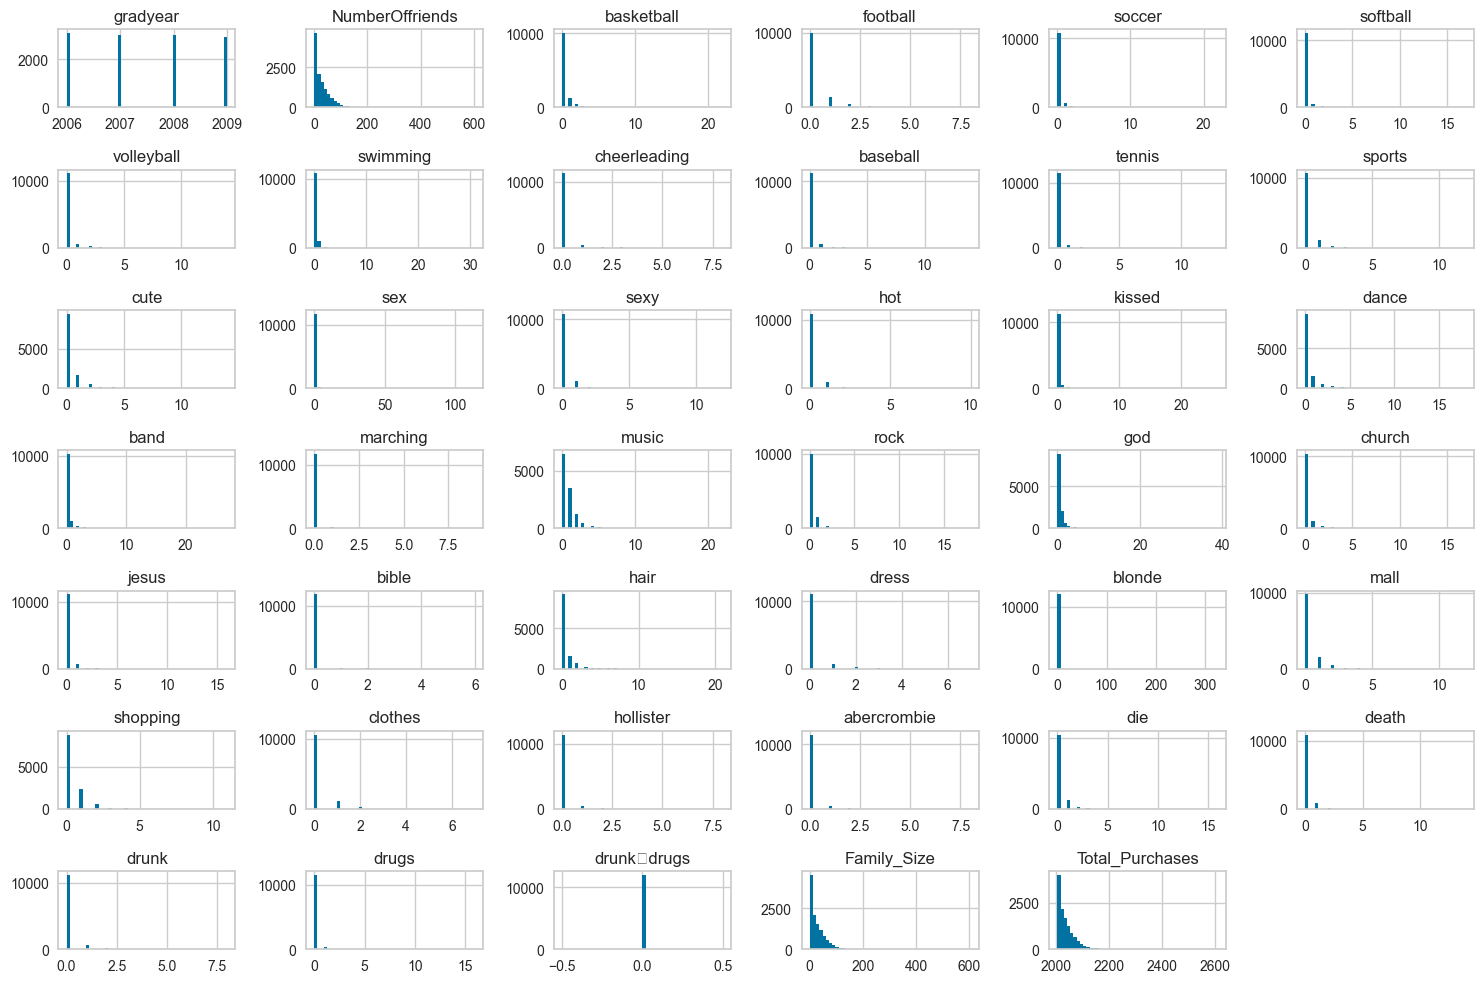

In [96]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()


<Axes: ylabel='clothes'>

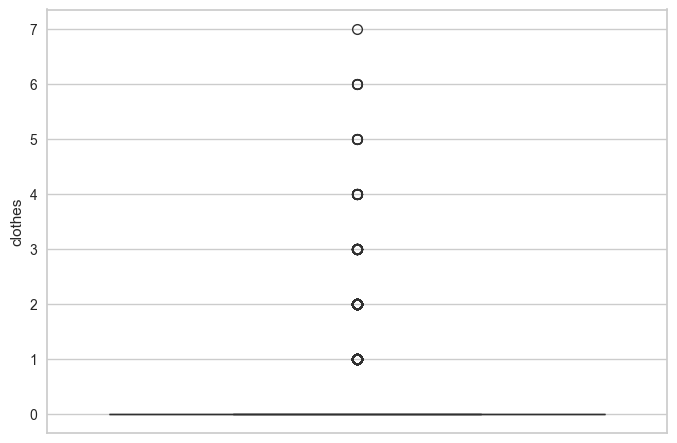

In [97]:
sns.boxplot(df['clothes'])

<Axes: ylabel='clothes'>

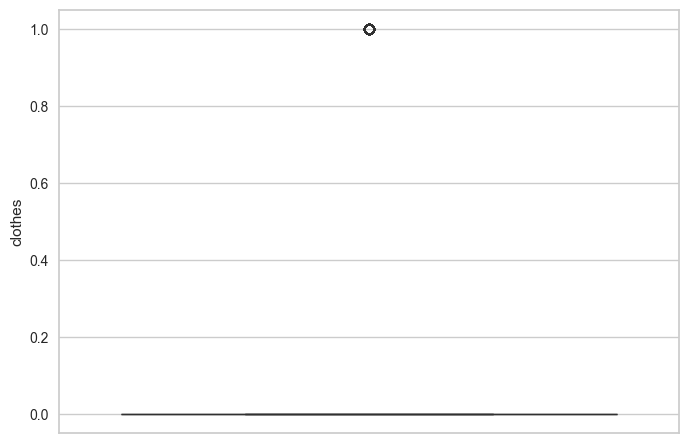

In [98]:
from feature_engine.outliers import OutlierTrimmer

remove_outlier = OutlierTrimmer(
    capping_method='quantiles', 
    tail='right',
    variables=['clothes']
)

df = remove_outlier.fit_transform(df)

sns.boxplot(df['clothes'])

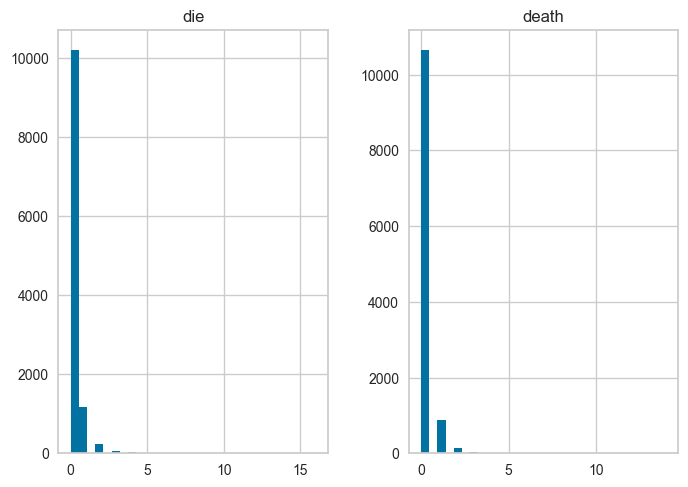

In [99]:
df[['die', 'death']].hist(bins=30)
plt.show()

In [100]:
df.drop(['die', 'death'], axis=1, inplace=True)

feature scaling 

In [101]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object'] # buat ngambil kolom numerik

numeric_cols

['gradyear',
 'NumberOffriends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'drunk',
 'drugs',
 'drunk\tdrugs',
 'Family_Size',
 'Total_Purchases']

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\3532309813.py:2: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\kipli\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


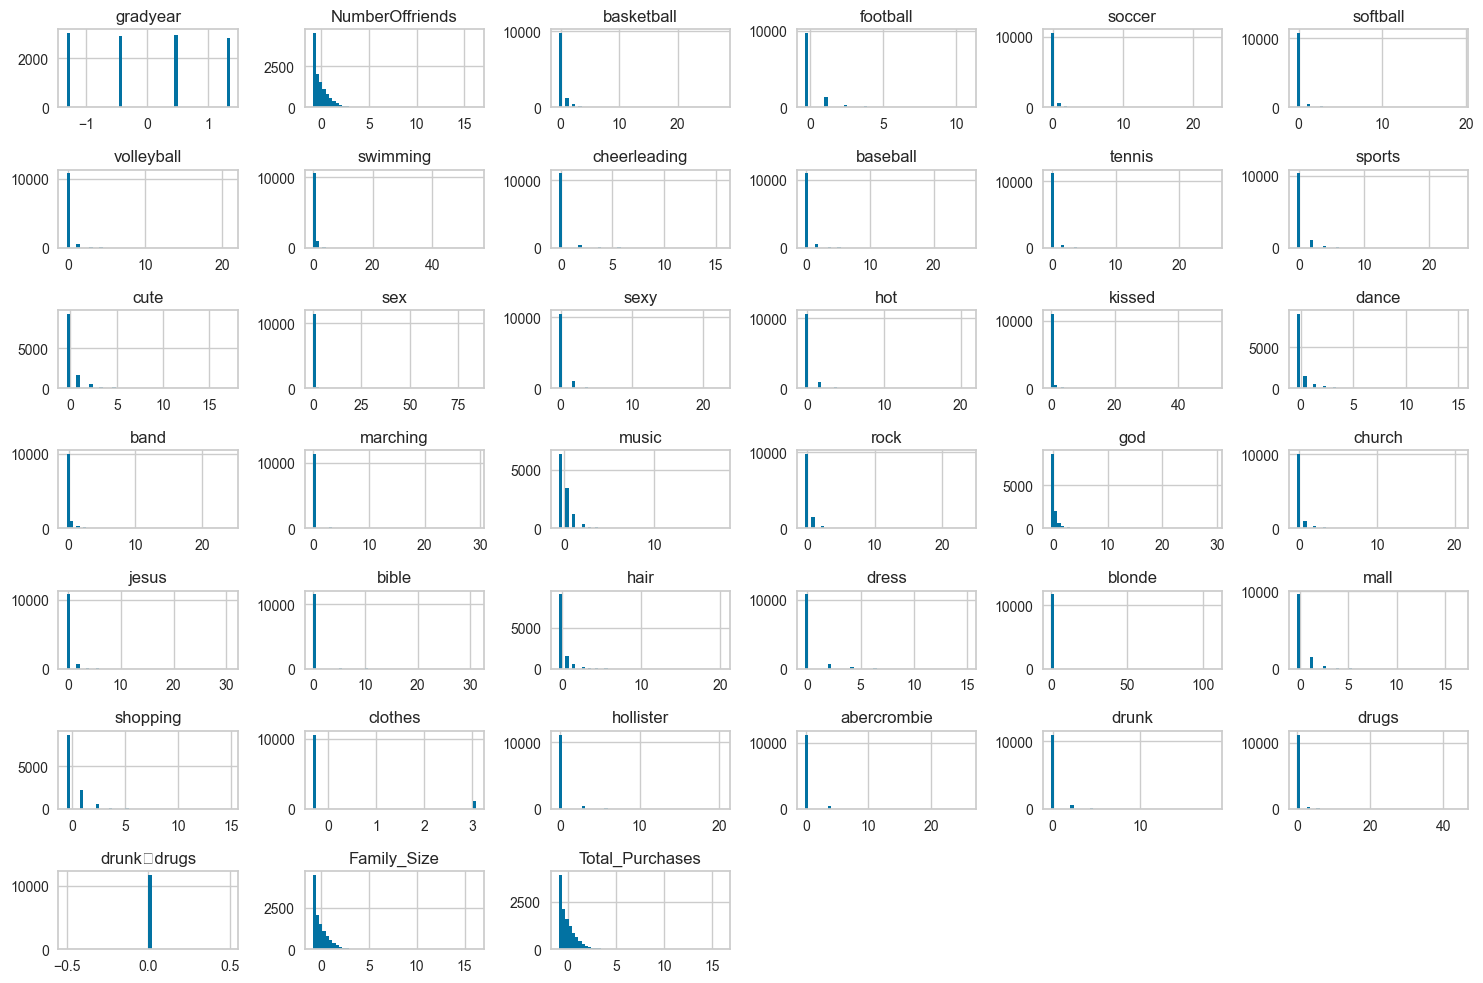

In [103]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

Dimensionality Reduction --> PCA method

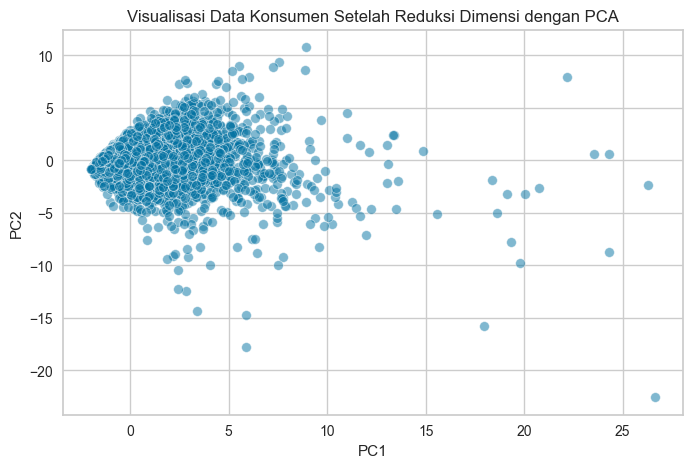

In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# mengurangi dimensi visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# membuat DataFrame hasil PCA
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisasi Data Konsumen Setelah Reduksi Dimensi dengan PCA')
plt.show()

In [105]:
df_pca

,PC1,PC2
0,-0.794370,-0.156598
1,2.468290,-1.432154
2,4.483427,1.330039
3,-0.305042,-0.983032
4,-1.041989,-0.680282
...,...,...
12037,0.530631,-0.424151
12038,-0.578905,-0.286477
12039,-1.150043,0.555021
12040,-1.413148,-0.054049


Text(0.5, 0, 'Constant Z')

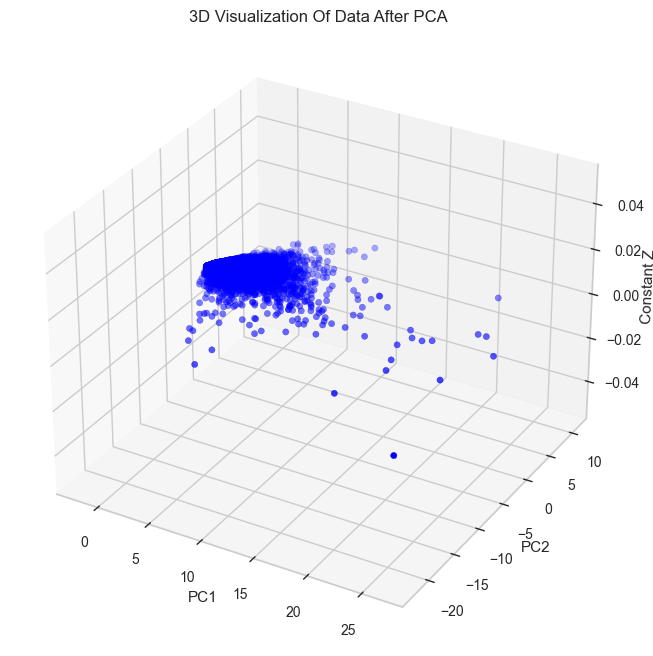

In [106]:
x, y = df_pca['PC1'], df_pca['PC2']
z = np.zeros_like(x)  

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", marker="o")
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Constant Z')

In [107]:
pca_full = PCA(n_components=10)
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([0.08610554, 0.04613535, 0.04179235, 0.04035179, 0.03880521,
       0.03366373, 0.029875  , 0.02908666, 0.02781747, 0.02701316])

K-means clustering

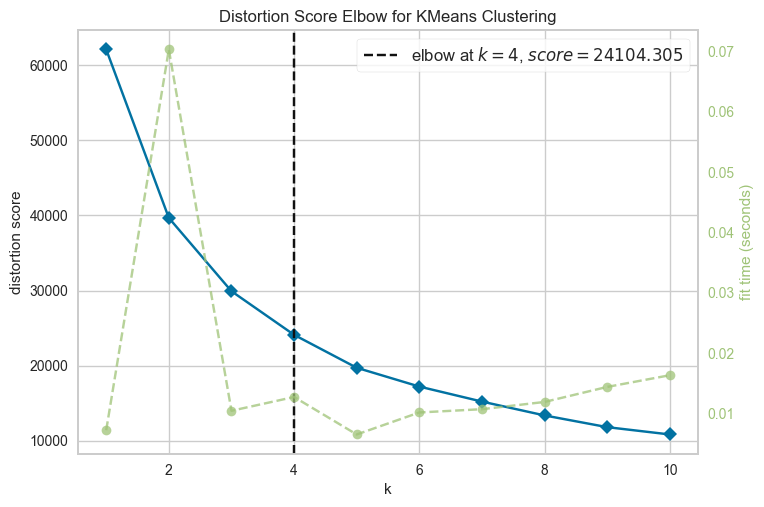

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()


In [109]:
kmeans = KMeans(n_clusters=4) # definisi model KMeans

y_kmeans = kmeans.fit_predict(df_pca) # clustering di data PCA

In [110]:
y_kmeans

array([3, 0, 2, ..., 3, 3, 0], shape=(12042,), dtype=int32)

c:\Users\kipli\project\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\kipli\project\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


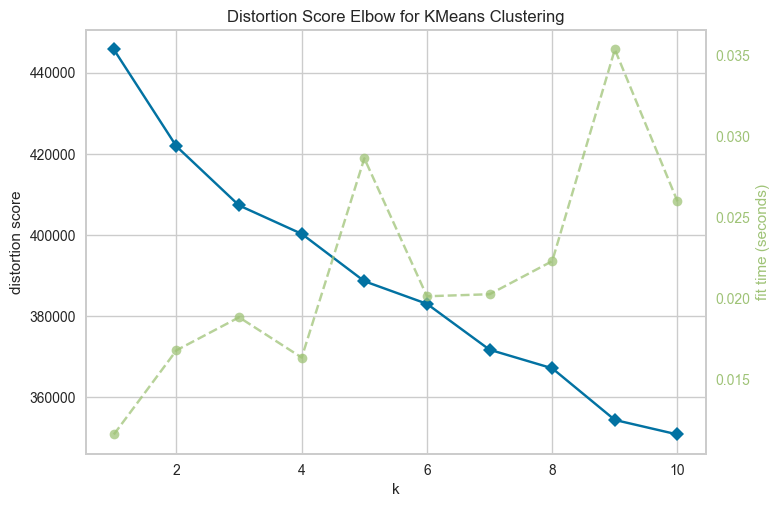

InvalidParameterError: The 'n_clusters' parameter of KMeans must be an int in the range [1, inf). Got None instead.

In [111]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

imputer = SimpleImputer(strategy='mean')

df_imputed = imputer.fit_transform(df)

pca = PCA()
df_pca = pca.fit_transform(df_imputed)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(df_pca)

visualizer.show()

optimal_clusters = visualizer.elbow_value_

kmeans = KMeans(n_clusters=optimal_clusters)

y_kmeans = kmeans.fit_predict(df_pca)

df['Cluster Kmeans'] = y_kmeans

In [ ]:
df['Cluster Kmeans'] = y_kmeans # meletakkan hasil clustering ke dalam DataFrame

In [ ]:
df

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,drunk,drugs,drunk\tdrugs,Family_Size,Total_Purchases,Cluster Kmeans
1,-0.426069,0.523371,-0.342263,-0.368479,0.809370,-0.222679,-0.220271,1.535396,-0.207741,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,2.117619,-0.169174,0.0,0.547134,0.513101,5
2,-0.426069,0.297849,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,1.625619,...,-0.492760,-0.324435,-0.194248,-0.183323,2.117619,2.633434,0.0,0.349835,0.262646,0
5,0.467914,0.044137,-0.342263,6.633941,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,-0.169174,0.0,0.039795,0.151332,5
6,-1.320052,-0.350526,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,-0.200361,...,-0.492760,3.082280,-0.194248,-0.183323,-0.218274,-0.169174,0.0,-0.354803,-0.433063,5
8,-1.320052,-0.857951,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,1.535396,-0.207741,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,-0.169174,0.0,-0.862142,-0.906145,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.467914,0.495181,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,2.633434,0.0,0.518949,0.457444,5
14996,0.467914,0.551562,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,1.625619,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,-0.169174,0.0,0.547134,0.540929,5
14997,-0.426069,0.044137,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,1.770011,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,-0.169174,0.0,0.039795,0.012190,5
14998,-0.426069,-0.294146,-0.342263,-0.368479,-0.243313,-0.222679,-0.220271,-0.239031,-0.207741,-0.200361,...,-0.492760,-0.324435,-0.194248,-0.183323,-0.218274,-0.169174,0.0,-0.298432,-0.349578,5


In [ ]:
palette_kmeans = ['#679436', '#eb5e28', '#4361ee', '#fb8500']


C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\625320699.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Cluster Kmeans', palette=palette_kmeans, bins=50)


<Axes: xlabel='Cluster Kmeans', ylabel='Count'>

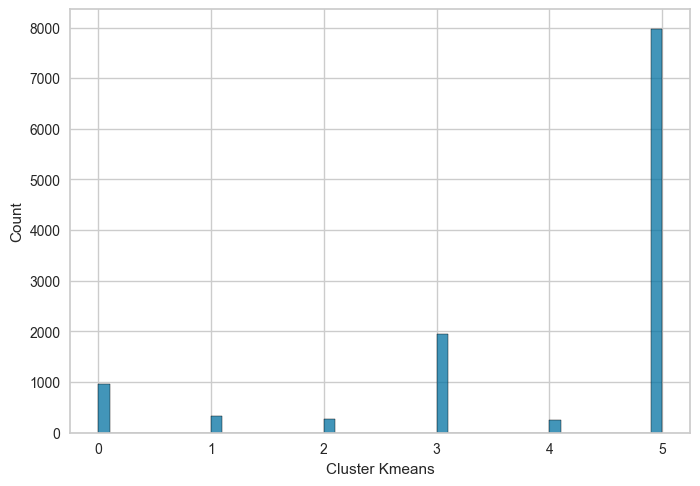

In [ ]:
sns.histplot(data=df, x='Cluster Kmeans', palette=palette_kmeans, bins=50)

C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\3220257515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster Kmeans', y='clothes', palette=palette_kmeans)
C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\3220257515.py:1: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='Cluster Kmeans', y='clothes', palette=palette_kmeans)


<Axes: xlabel='Cluster Kmeans', ylabel='clothes'>

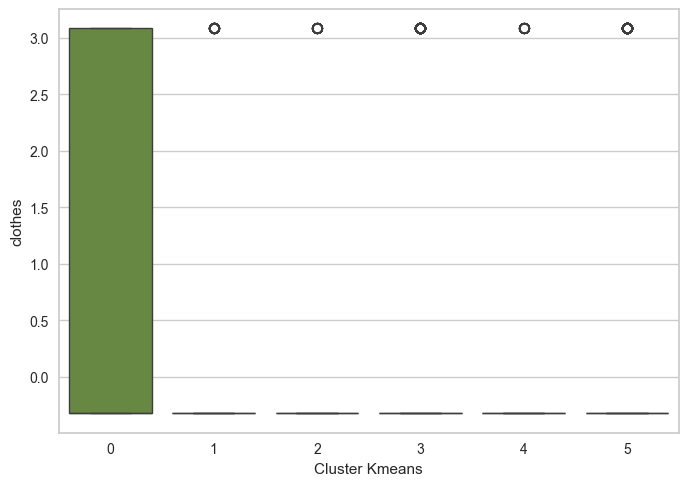

In [ ]:
sns.boxplot(data=df, x='Cluster Kmeans', y='clothes', palette=palette_kmeans)

C:\Users\kipli\AppData\Local\Temp\ipykernel_23612\2722672462.py:1: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Cluster Kmeans', y='clothes', data=df, hue='Cluster Kmeans', palette=palette_kmeans)


<Axes: xlabel='Cluster Kmeans', ylabel='clothes'>

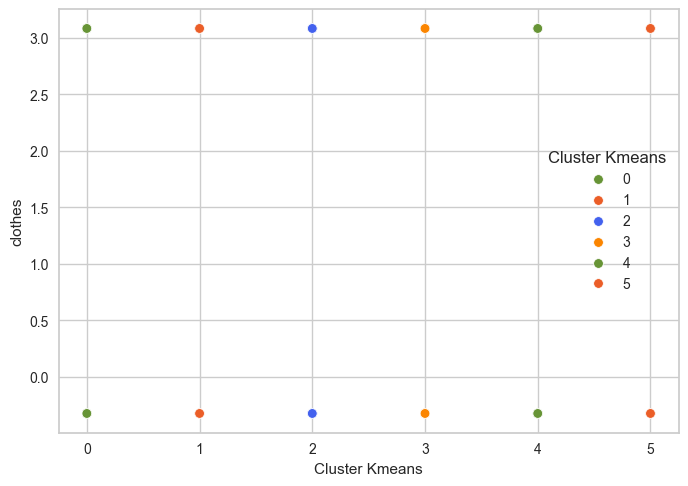

In [ ]:
sns.scatterplot(x='Cluster Kmeans', y='clothes', data=df, hue='Cluster Kmeans', palette=palette_kmeans)

In [ ]:
from sklearn.cluster import KMeans

X = df[['clothes']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print("Inertia:", kmeans.inertia_)

Inertia: 8.2246046332663775e-25


c:\Users\kipli\project\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import silhouette_score

# menghitung silhouette score
sil_score = silhouette_score(X, kmeans.labels_)
print(sil_score)

1.0


c:\Users\kipli\project\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\kipli\project\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\kipli\project\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\kipli\project\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\kipli\project\Lib\site-packages\sklearn\bas

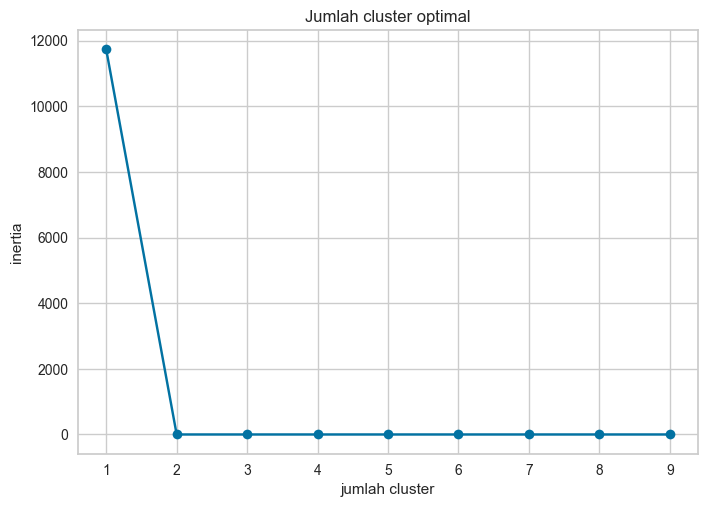

In [ ]:
import matplotlib.pyplot as plt

inertia_values = []
k_range = range(1, 10) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('jumlah cluster')
plt.ylabel('inertia')
plt.title('Jumlah cluster optimal')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[1, 2], [2, 3], [3, 4], [8, 7], [8, 8], [25, 80]])

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


dbscan = DBSCAN(eps=0.5, min_samples=5)

labels = dbscan.fit_predict(X_scaled)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X_scaled)

print("clustering Agglomerative:", labels)

clustering Agglomerative: [0 0 0 2 2 1]


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(X_scaled)

print("clustering GMM:", labels)

clustering GMM: [0 0 0 2 2 1]
